# Explore here

In [6]:
# === Celda 1: Importar librerías ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib


df= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
print("Información del dataset:")
print(df.info())

print("\nValores nulos por columna:")
print(df.isnull().sum())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
Di

In [8]:
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

# Mostrar cantidad de nulos después del reemplazo
print("Nulos luego de reemplazar ceros inválidos:")
print(df[cols_with_invalid_zeros].isnull().sum())

# Imputación con mediana
for col in cols_with_invalid_zeros:
    df[col] = df[col].fillna(df[col].median())


Nulos luego de reemplazar ceros inválidos:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


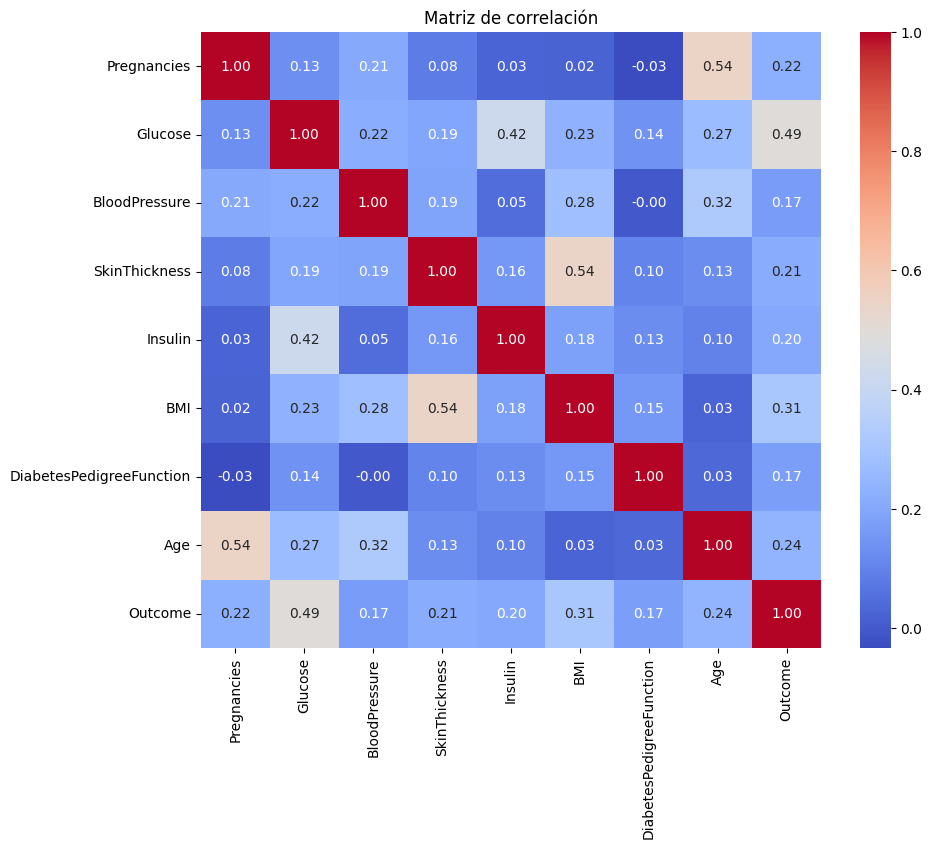

In [9]:
display(df.describe())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


Observaciones clave del EDA:

a.Glucose muestra la mayor correlación con Outcome (0.49) → muy buen predictor.

b.BMI, Age y Pregnancies también tienen correlaciones aceptables con Outcome.

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de test:", X_test.shape)

Tamaño de entrenamiento: (614, 8)
Tamaño de test: (154, 8)


Accuracy: 0.7792207792207793

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



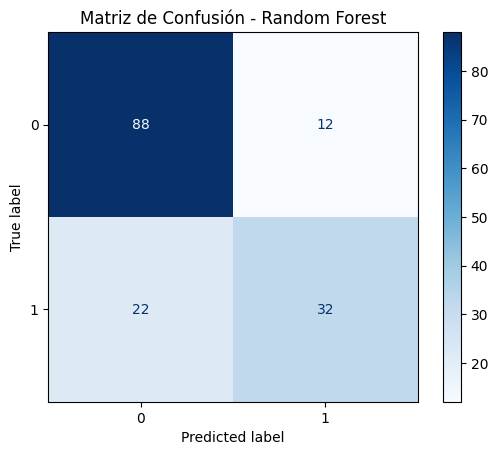

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=rf_clf.classes_).plot(cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

OPTIMIZANDO PARAMETROS

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_d

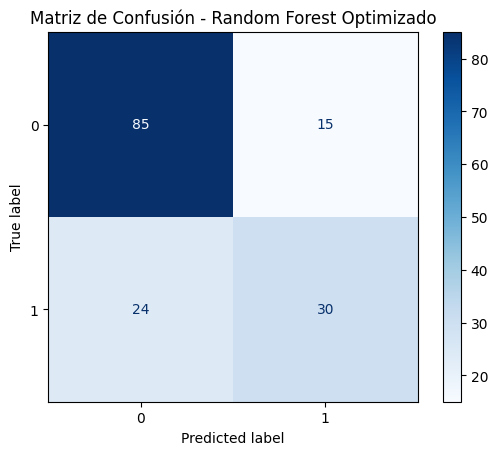

In [12]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")
best_rf_clf = grid_search.best_estimator_


y_pred_best = best_rf_clf.predict(X_test)
print("Mejor Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nMejor Reporte de clasificación:\n", classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(cm_best, display_labels=best_rf_clf.classes_).plot(cmap="Blues")
plt.title("Matriz de Confusión - Random Forest Optimizado")
plt.show()


Conclusiones hasta esta etapa.

Tras un primer entrenamiento básico, se obtuvo un accuracy del 77.9%, con un recall del 59% para la clase positiva (diabéticos).

Posteriormente se aplicó GridSearchCV para optimizar los hiperparámetros del modelo, evaluando combinaciones de n_estimators, max_depth, min_samples_split y min_samples_leaf.

El modelo optimizado obtuvo un accuracy del 75%, pero con un ligero descenso en recall para la clase positiva (56%), lo que sugiere que el modelo base era suficientemente bueno.

La matriz de confusión mostró que el modelo tiende a predecir correctamente la clase 0 (no diabético), pero aún tiene margen de mejora en la detección de la clase 1 (diabético).

Posibles mejoras futuras:

Ajustar el parámetro class_weight='balanced' para penalizar el error en la clase minoritaria.

Ampliar el grid de búsqueda o usar técnicas más sofisticadas como RandomizedSearchCV.

Probar modelos alternativos como XGBoost o Logistic Regression regularizada.

Accuracy con balanceo: 0.7467532467532467

Reporte de clasificación balanceado:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



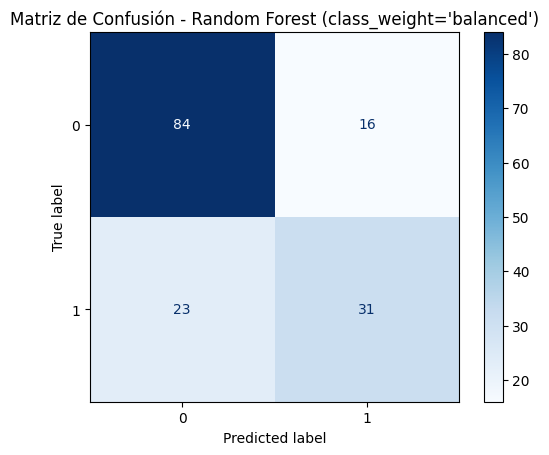

In [13]:
rf_balanced = RandomForestClassifier(n_estimators=100, 
                                     class_weight='balanced', 
                                     random_state=42)

rf_balanced.fit(X_train, y_train)


y_pred_bal = rf_balanced.predict(X_test)

print("Accuracy con balanceo:", accuracy_score(y_test, y_pred_bal))
print("\nReporte de clasificación balanceado:\n", classification_report(y_test, y_pred_bal))

cm_bal = confusion_matrix(y_test, y_pred_bal)
ConfusionMatrixDisplay(cm_bal, display_labels=rf_balanced.classes_).plot(cmap="Blues")
plt.title("Matriz de Confusión - Random Forest (class_weight='balanced')")
plt.show()

Interpretación:

Aunque el accuracy bajó ligeramente, se mantuvo muy similar al optimizado.

Lo más importante: recall y f1-score para la clase 1 mejoraron levemente, lo cual es clave cuando hablamos de predicción de enfermedades como la diabetes.

El modelo ahora es más justo con la clase minoritaria (diabéticos), que en la vida real suele ser la clase crítica a detectar.

Conclusión Final:

El modelo con class_weight='balanced' se considera el más apropiado para este caso, ya que mejora el balance entre sensibilidad y precisión en la detección de pacientes diabéticos, que es el objetivo más crítico de este análisis.